In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ROOT = '/content/drive/MyDrive/A5/Mémoire/notebooks'
import sys
sys.path.append(ROOT)

In [4]:
import os  # for path dirs and files
import tqdm  # progress bar

# to deal with data
import numpy as np
import pandas as pd

# plot the results
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
df = pd.read_csv(os.path.join(ROOT, 'data', 'results_final.csv'))  # read file
df['day'] = pd.to_datetime(df['day'])                              # convert the str days to dates
df

,pair,day,return,set,naive,linear_regression,knn_regressor,rf_regressor,dnn,lstm,gpt2
0,AUDCAD,2007-10-23,0.007541,unpredictable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUDCAD,2007-10-24,0.003915,unpredictable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUDCAD,2007-10-25,0.002523,unpredictable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUDCAD,2007-10-26,0.005835,unpredictable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUDCAD,2007-10-29,0.007962,unpredictable,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
225203,ZARJPY,2020-12-25,-0.002822,test,0.004251,0.000222,0.001476,-0.001028,-0.000169,0.001145,-0.002492
225204,ZARJPY,2020-12-28,0.004670,test,-0.002822,-0.000062,0.003456,0.000891,0.001152,0.000113,-0.000571
225205,ZARJPY,2020-12-29,-0.002113,test,0.004670,-0.000604,0.004920,0.000494,0.000526,0.000157,0.004775
225206,ZARJPY,2020-12-30,-0.006775,test,-0.002113,0.000037,-0.001294,0.001143,0.002579,0.000902,-0.007417


In [8]:
dict_columns = {
    'naive': 'Naive',
    'linear_regression': 'Linear',
    'knn_regressor': 'KNN',
    'rf_regressor': 'RF',
    'dnn': 'DNN',
    'lstm': 'CNN-LSTM',
    'gpt2': 'GPT-2'
}
model_columns = [v for k, v in dict_columns.items()]
df = df.rename(columns=dict_columns)
df

,pair,day,return,set,Naive,Linear,KNN,RF,DNN,CNN-LSTM,GPT-2
0,AUDCAD,2007-10-23,0.00754,unpredictable,nan,nan,nan,nan,nan,nan,nan
1,AUDCAD,2007-10-24,0.00391,unpredictable,nan,nan,nan,nan,nan,nan,nan
2,AUDCAD,2007-10-25,0.00252,unpredictable,nan,nan,nan,nan,nan,nan,nan
3,AUDCAD,2007-10-26,0.00583,unpredictable,nan,nan,nan,nan,nan,nan,nan
4,AUDCAD,2007-10-29,0.00796,unpredictable,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
225203,ZARJPY,2020-12-25,-0.00282,test,0.00425,0.00022,0.00148,-0.00103,-0.00017,0.00115,-0.00249
225204,ZARJPY,2020-12-28,0.00467,test,-0.00282,-0.00006,0.00346,0.00089,0.00115,0.00011,-0.00057
225205,ZARJPY,2020-12-29,-0.00211,test,0.00467,-0.00060,0.00492,0.00049,0.00053,0.00016,0.00477
225206,ZARJPY,2020-12-30,-0.00677,test,-0.00211,0.00004,-0.00129,0.00114,0.00258,0.00090,-0.00742


## Comparaison RMSE

In [77]:
data_results = []
columns_results = ['split', 'metric'] + model_columns

dict_metrics = {
    'mean': pd.Series.mean,
    'std': pd.Series.std,
    'skewness': pd.Series.skew,
    'kurtosis': pd.Series.kurt  
}


def compute_rmse(pred, true):
    return ((pred - true) ** 2 ) ** 0.5 

splits = ['training', 'validation', 'test']
for split in splits:
    _df = df[df['set'] == split]

    rmse_models = [
        compute_rmse(_df[model_column], _df['return']) 
        for model_column in model_columns
    ]

    for metric_name, metric_func in dict_metrics.items():
        
        rmse_models_metric = [metric_func(rmse_model) for rmse_model in rmse_models]
        row = [split, metric_name] + rmse_models_metric
        data_results.append(row)



pd.options.display.float_format = '{:.5f}'.format


df_results = pd.DataFrame(data_results, columns=columns_results)
df_results

# for i, row in enumerate(df_results.values[:, 2:]):

#     if i % len(dict_metrics) == 0:
#         print(splits[int(i // len(dict_metrics))], '& '*len(row), r'\\')
    
#     str_row = ' & '.join([f'{r:.5f}' for r in row])
#     metric = list(dict_metrics.keys())[i % len(dict_metrics)]
#     print(r'\quad\quad ', metric, r' & ', str_row, r'\\')

training &&&&&&& \\
\quad\quad  mean  &  0.00635 & 0.00446 & 0.00384 & 0.00163 & 0.00421 & 0.00143 & 0.00005 \\
\quad\quad  std  &  0.00574 & 0.00412 & 0.00347 & 0.00151 & 0.00378 & 0.00131 & 0.00039 \\
\quad\quad  skewness  &  2.04632 & 2.03215 & 1.96178 & 2.04928 & 1.87853 & 2.00540 & 37.44932 \\
\quad\quad  kurtosis  &  7.49394 & 6.42832 & 6.06913 & 6.59064 & 5.48066 & 6.21886 & 1793.08760 \\
validation &&&&&&& \\
\quad\quad  mean  &  0.00596 & 0.00419 & 0.00416 & 0.00416 & 0.00417 & 0.00419 & 0.00589 \\
\quad\quad  std  &  0.00608 & 0.00431 & 0.00403 & 0.00422 & 0.00422 & 0.00431 & 0.00685 \\
\quad\quad  skewness  &  2.33062 & 2.27068 & 2.08996 & 2.20494 & 2.19593 & 2.26013 & 23.34388 \\
\quad\quad  kurtosis  &  8.64405 & 7.44886 & 6.66445 & 7.02143 & 7.02624 & 7.38343 & 1401.44646 \\
test &&&&&&& \\
\quad\quad  mean  &  0.00777 & 0.00546 & 0.00559 & 0.00544 & 0.00547 & 0.00547 & 0.00704 \\
\quad\quad  std  &  0.00813 & 0.00574 & 0.00576 & 0.00572 & 0.00573 & 0.00575 & 0.00814 \\
\

## Stratégie d'investissement

**On part du postulat que le portefeuille est parfaitement équilibré entre les devises pour chcun des jours du dataset.**

In [79]:
data_results = []
columns_results = ['split', 'metric'] + model_columns


COST_RATIO = 0.001
N_DAY_BY_YEAR = 252


def set_strategy(pred, true, cost_ratio=0):

    strategy_returns = []
    strategy_executions = []
    for p, t in zip(pred, true):
        if p > cost_ratio:
            strategy_returns.append(t - cost_ratio)
            strategy_executions.append(1)
        elif p < -cost_ratio:
            strategy_returns.append(-t - cost_ratio)
            strategy_executions.append(1)
        else:
            strategy_returns.append(0)
            strategy_executions.append(0)

    return np.array(strategy_returns), np.array(strategy_executions)


for split in ['training', 'validation', 'test']:
    _df = df[df['set'] == split]

    strategy_excl = [
        set_strategy(_df[model_column], _df['return'], cost_ratio=0)             
        for model_column in model_columns
    ]
    strategy_incl = [
        set_strategy(_df[model_column], _df['return'], cost_ratio=COST_RATIO)             
        for model_column in model_columns
    ]

    # compute the Annualized return (costs null) (%)
    an_return_excl = [
        ((1 + strategy_returns).mean() ** N_DAY_BY_YEAR - 1) * 100
        for strategy_returns, strategy_executions in strategy_excl
    ]
    data_results.append([split, "Annualized return (costs null) (%)"] + an_return_excl)

    # compute the Annualized volatilty (costs null) (%)
    an_volatility_excl = [
        strategy_returns.std() * N_DAY_BY_YEAR * 100
        for strategy_returns, strategy_executions in strategy_excl
    ]
    data_results.append([split, "Annualized volatilty (costs null) (%)"] + an_volatility_excl)

    # compute the Positions taken (including costs) (annualized)
    an_position_taken = [
        strategy_executions.mean() * N_DAY_BY_YEAR
        for strategy_returns, strategy_executions in strategy_incl
    ]
    data_results.append([split, "Positions taken (including costs) (annualized)"] + an_position_taken)

    
    # compute the Annualized return (including costs) (%)
    an_return_incl = [
        ((1 + strategy_returns).mean() ** N_DAY_BY_YEAR - 1) * 100
        for strategy_returns, strategy_executions in strategy_incl
    ]
    data_results.append([split, "Annualized return (including costs) (%)"] + an_return_incl)

    # compute the Annualized volatilty (including costs) (%)
    an_volatility_incl = [
        strategy_returns.std() * N_DAY_BY_YEAR * 100
        for strategy_returns, strategy_executions in strategy_incl
    ]
    data_results.append([split, "Annualized volatilty (including costs) (%)"] + an_volatility_incl)


pd.options.display.float_format = '{:.2f}'.format
df_results = pd.DataFrame(data_results, columns=columns_results)
df_results


dict_metrics = {
    'Annualized return (costs null) (%)': None,
    'Annualized volatilty (costs null) (%)': None,
    'Positions taken (including costs) (annualized)': None,
    'Annualized return (including costs) (%)': None,  
    'Annualized volatilty (including costs) (%)': None  
}
for i, row in enumerate(df_results.values[:, 2:]):

    if i % len(dict_metrics) == 0:
        print(splits[int(i // len(dict_metrics))], '& '*len(row), r'\\')
    
    str_row = ' & '.join([f'{r:.2f}' for r in row])
    metric = list(dict_metrics.keys())[i % len(dict_metrics)].replace('%', r'\%')
    print(r'\quad\quad ', metric, r' & ', str_row, r'\\')

training & & & & & & &  \\
\quad\quad  Annualized return (costs null) (\%)  &  1.24 & 3.68 & 85.56 & 205.78 & 51.83 & 206.28 & 205.78 \\
\quad\quad  Annualized volatilty (costs null) (\%)  &  152.45 & 152.70 & 139.64 & 103.84 & 146.91 & 103.66 & 103.84 \\
\quad\quad  Positions taken (including costs) (annualized)  &  210.16 & 11.85 & 150.65 & 187.83 & 63.38 & 191.46 & 209.10 \\
\quad\quad  Annualized return (including costs) (\%)  &  -17.97 & -1.09 & 48.14 & 141.42 & 21.56 & 142.28 & 142.93 \\
\quad\quad  Annualized volatilty (including costs) (\%)  &  142.81 & 51.41 & 118.56 & 102.27 & 94.43 & 102.00 & 101.84 \\
validation & & & & & & &  \\
\quad\quad  Annualized return (costs null) (\%)  &  1.49 & 3.83 & 25.08 & 12.44 & 12.23 & 2.64 & 0.52 \\
\quad\quad  Annualized volatilty (costs null) (\%)  &  151.25 & 151.45 & 149.83 & 151.04 & 151.06 & 151.47 & 149.13 \\
\quad\quad  Positions taken (including costs) (annualized)  &  201.14 & 11.31 & 134.00 & 29.35 & 55.24 & 25.64 & 201.89 \\
\qu

## Plot par année


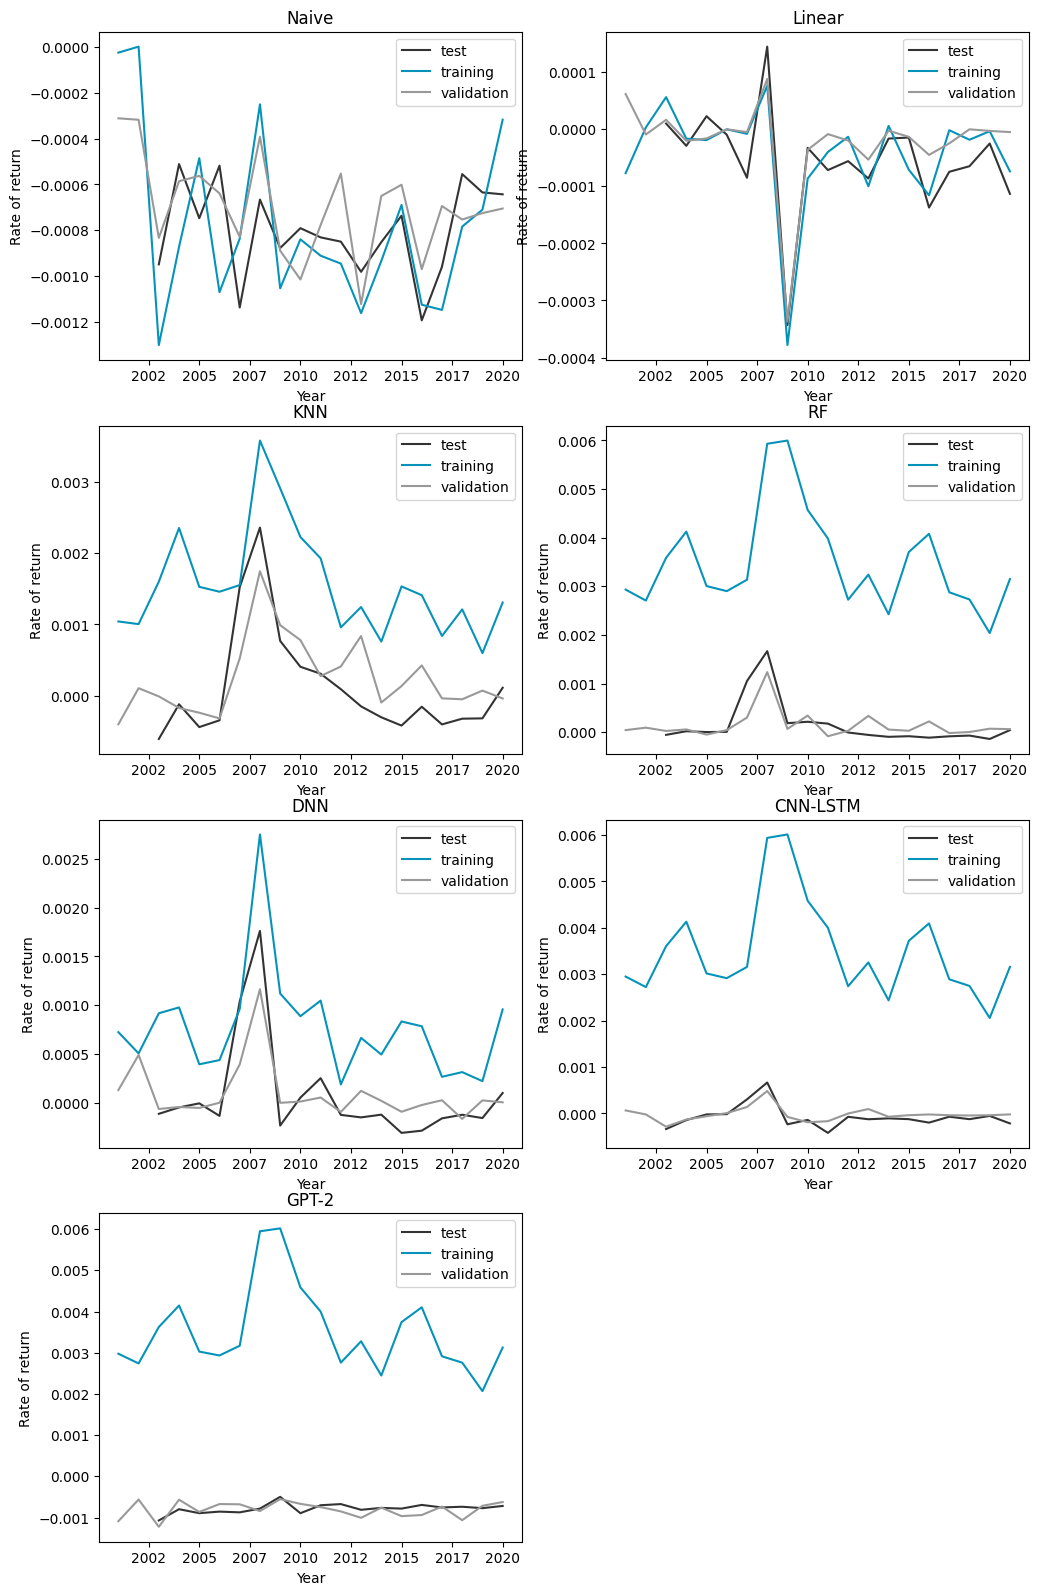

In [23]:
plt.rcParams['figure.figsize'] = [12, 20]
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(4, 2)
axes = np.array(axes).flatten()
set_to_color = {'training': '#0593ba', 'validation': '#999999', 'test': '#333333'}

for model_column, ax in zip(model_columns, axes):

    for split, split_group in df[df['set'] != 'unpredictable'].groupby('set'):

        split_df = split_group.reset_index()
        color = set_to_color[split]

        strategy_returns, strategy_executions = set_strategy(split_df[model_column], split_df['return'], cost_ratio=COST_RATIO)
        split_df['strategy_returns'] = strategy_returns
        split_df.groupby(split_df['day'].dt.year)['strategy_returns'].mean().reset_index().plot(x='day', y='strategy_returns', ax=ax, label=split, color=color)
        ax.set_title(model_column)
        ax.set_xlabel('Year')
        ax.set_ylabel('Rate of return')
        ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

axes.flat[-1].set_visible(False) # to remove last plot
plt.show()
plt.rcParams['figure.figsize'] = [12, 4]


## Plot par devise




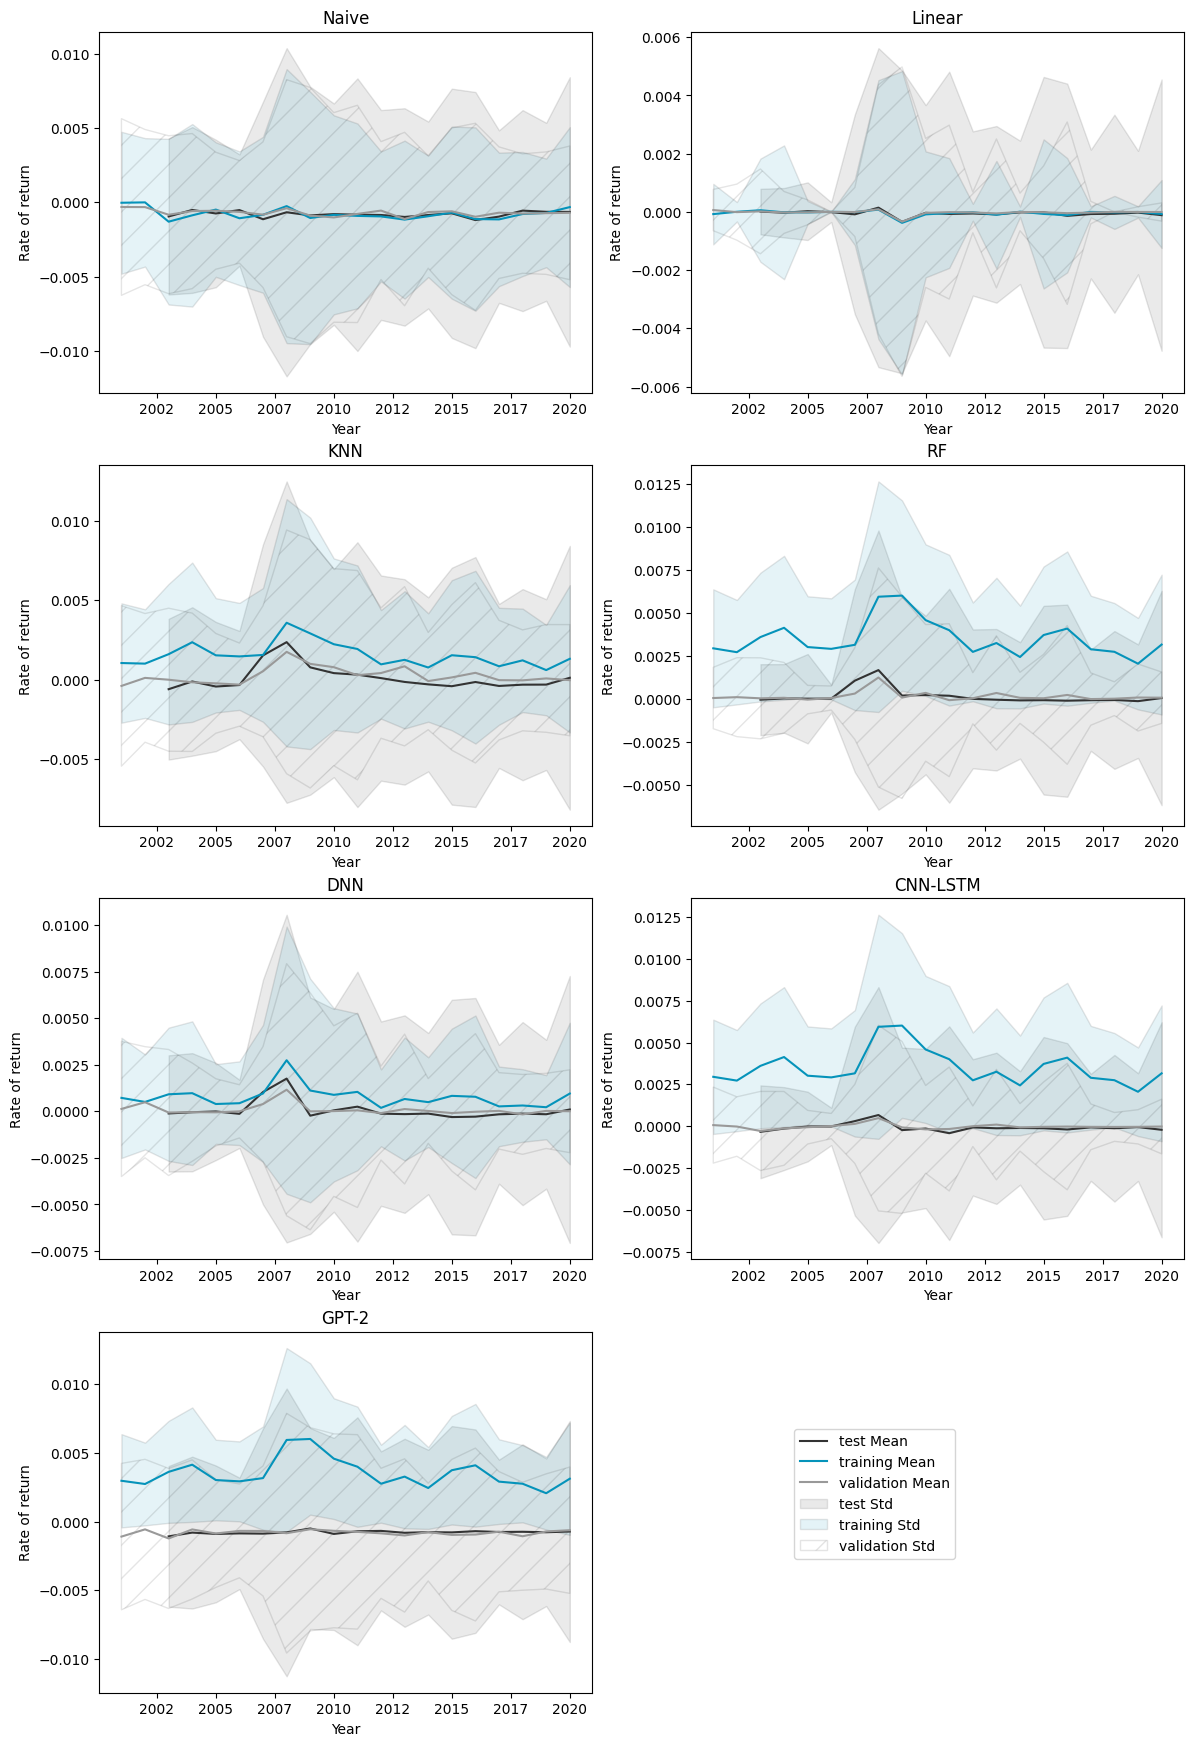

In [59]:
plt.rcParams['figure.figsize'] = [14, 22]
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(4, 2)
axes = np.array(axes).flatten()
set_to_color = {'training': '#0593ba', 'validation': '#999999', 'test': '#333333'}
set_to_hatch_color = {'training': '#0593ba', 'validation': 'none', 'test': '#333333'}
set_to_hatch = {'training': None, 'validation': '/', 'test': None}

for model_column, ax in zip(model_columns, axes):

    for split, split_group in df[df['set'] != 'unpredictable'].groupby('set'):

        split_df = split_group.reset_index()
        color = set_to_color[split]

        strategy_returns, strategy_executions = set_strategy(split_df[model_column], split_df['return'], cost_ratio=COST_RATIO)
        split_df['strategy_returns'] = strategy_returns
        
        group_split_df = split_df.groupby(split_df['day'].dt.year)['strategy_returns']
        year = group_split_df.mean().reset_index()['day']
        mean = group_split_df.mean().reset_index()['strategy_returns']
        std = group_split_df.std().reset_index()['strategy_returns']
        
        ax.fill_between(year, mean - std, mean + std, facecolor=set_to_hatch_color[split], edgecolor='#000', hatch=set_to_hatch[split], alpha=0.1, label=f'{split} Std')
        group_split_df.mean().reset_index().plot(x='day', y='strategy_returns', ax=ax, label=f'{split} Mean', color=color)


        ax.set_title(model_column)
        ax.legend(bbox_to_anchor=(1.75, 0.75))
        ax.set_xlabel('Year')
        ax.set_ylabel('Rate of return')
        ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

for ax in axes[:6]:
    ax.get_legend().remove()
axes.flat[-1].set_visible(False) # to remove last plot

plt.show()
plt.rcParams['figure.figsize'] = [12, 4]
